In [1]:
%%capture
%pip install nflfastpy==0.0.8

In [2]:
import nflfastpy
from nflfastpy.utils import convert_to_gsis_id
from nflfastpy import default_headshot
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import requests

Example default player headshot



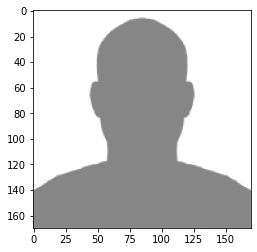

In [8]:
print('Example default player headshot\n')
plt.imshow(default_headshot);

In [9]:
df = nflfastpy.load_pbp_data(year=2020)
roster_df = nflfastpy.load_roster_data()
team_logo_df = nflfastpy.load_team_logo_data()

In [11]:
roster_df = roster_df.loc[roster_df['team.season'] == 2019]

air_yards_df = df.loc[df['pass_attempt'] == 1, ['receiver_player_id', 'receiver_player_name', 'posteam', 'air_yards']]

air_yards_df = air_yards_df.loc[air_yards_df['receiver_player_id'].notnull()]

air_yards_df['gsis_id'] = air_yards_df['receiver_player_id'].apply(convert_to_gsis_id)

#grabbing the top 5 air yards
top_5 = air_yards_df.groupby('gsis_id')['air_yards'].sum().sort_values(ascending=False)[:5].index.unique()

air_yards_df = air_yards_df.loc[air_yards_df['gsis_id'].isin(top_5)]

air_yards_df.head()

,receiver_player_id,receiver_player_name,posteam,air_yards,gsis_id
947,32013030-2d30-3033-3330-3430e890f1ff,T.Hill,KC,3.0,00-0033040
968,32013030-2d30-3033-3330-3430e890f1ff,T.Hill,KC,24.0,00-0033040
1006,32013030-2d30-3033-3330-3430e890f1ff,T.Hill,KC,5.0,00-0033040
1011,32013030-2d30-3033-3330-3430e890f1ff,T.Hill,KC,0.0,00-0033040
1029,32013030-2d30-3033-3330-3430e890f1ff,T.Hill,KC,14.0,00-0033040


In [12]:
air_yards_df['receiver_player_name'].unique()

array(['T.Hill', 'S.Diggs', 'C.Ridley', 'D.Metcalf', 'J.Jeudy'],
      dtype=object)

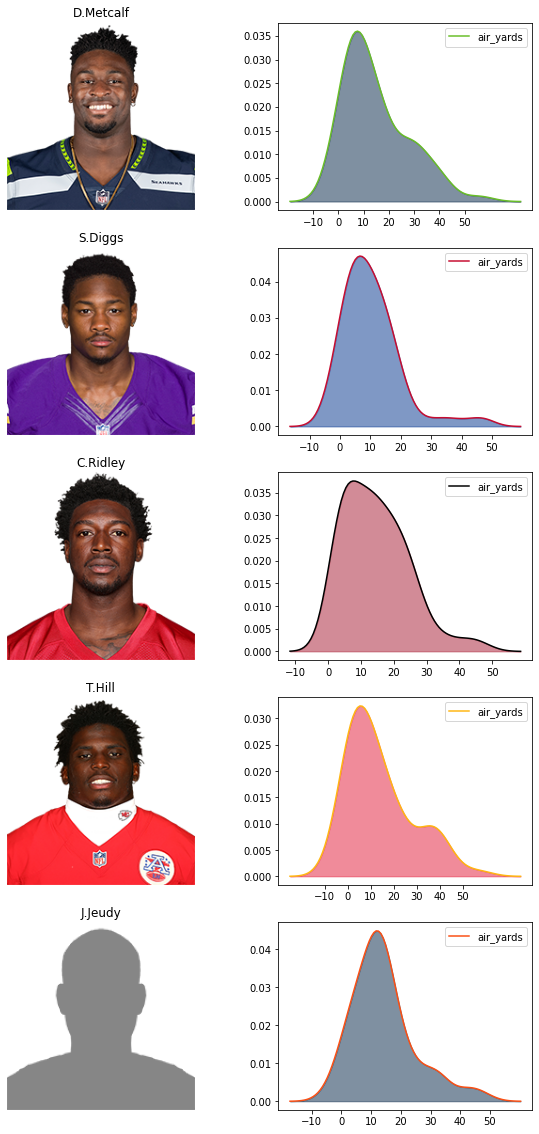

In [18]:
fig, axes = plt.subplots(5, 2, figsize=(10, 20))

for i, row in enumerate(axes):
    
    ax1, ax2 = row[0], row[1]
    
    player_gsis_id = top_5[i]
    player_df = air_yards_df.loc[air_yards_df['gsis_id'] == player_gsis_id]
    team_logo_data = team_logo_df.loc[team_logo_df['team_abbr'] == player_df['posteam'].values[0]]
    team_color_1 = team_logo_data['team_color'].values[0]
    team_color_2 = team_logo_data['team_color2'].values[0]

    player_roster_data = roster_df.loc[roster_df['teamPlayers.gsisId'] == player_gsis_id]

    if player_roster_data.empty:
        #if the player is a rookie
        a = default_headshot
    else:
        player_headshot = player_roster_data['teamPlayers.headshot_url'].values[0]
        a = plt.imread(player_headshot)
    
    ax1.set_title(player_df['receiver_player_name'].values[0])
    ax1.imshow(a)
    ax1.axis('off')
    sns.kdeplot(player_df['air_yards'], color=team_color_2, ax=ax2)
    x = ax2.get_lines()[0].get_xydata()[:, 0]
    y = ax2.get_lines()[0].get_xydata()[:, 1]
    ax2.set_xticks(range(-10, 60, 10))
    ax2.fill_between(x, y, color=team_color_1, alpha=0.5)

plt.show();